# Ch 8 - Applied Problems

In [30]:
import sklearn
sklearn.__version__

'1.6.1'

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, BaggingRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier, export_text

 ## Problem 7
 - In Section 8.3.3, we applied random forests to the Boston data using max_features = 6 and using n_estimators = 100 and n_estimators = 500. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for max_features and n_estimators. You can model your plot after Figure 8.10. Describe the results obtained.

In [4]:
boston = pd.read_csv('./data/Boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


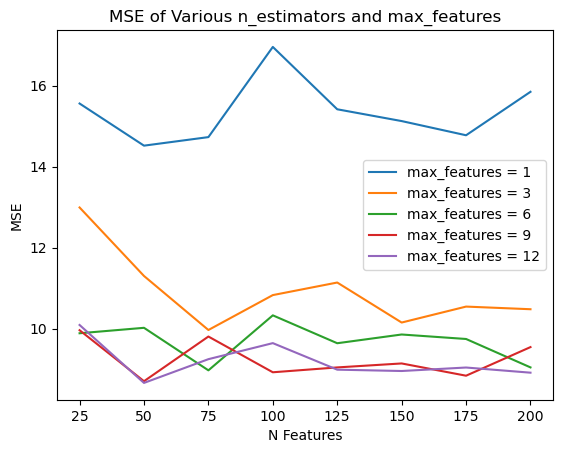

In [12]:
X_train, X_test, y_train, y_test = train_test_split(boston.drop(columns=['medv']), 
                                                    boston['medv'], 
                                                    test_size=0.2, random_state=1)

# Declare rf model, some params, and the do 2 loops (can't do grid search)
max_features = [1, 3, 6, 9, 12]
n_estimators = [25, 50, 75, 100, 125, 150, 175, 200]

mses = np.zeros((len(max_features), len(n_estimators)))
for i, m in enumerate(max_features):
    for j, n in enumerate(n_estimators):
        rf = RandomForestRegressor(max_features=m, n_estimators=n)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        mses[i,j] = mean_squared_error(y_test, y_pred)
    plt.plot(n_estimators, mses[i,:], label=f"max_features = {m}")
# Plot results
plt.title("MSE of Various n_estimators and max_features")
plt.xlabel("N Features")
plt.ylabel("MSE")
plt.legend()
plt.show()


## Problem 8
In the lab, a classification tree was applied to the Carseats data set af- ter converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

(a) Split the data set into a training set and a test set.

(b) Fit a regression tree to the training set. Plot the tree, and inter- pret the results. What test MSE do you obtain?

(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

(d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important.

(e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

(f) Now analyze the data using BART, and report your results.

In [18]:
carseats = pd.read_csv('./data/Carseats.csv')
carseats = pd.get_dummies(carseats, columns=['ShelveLoc', 'Urban', 'US'])
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,True,False,False,False,True,False,True
1,11.22,111,48,16,260,83,65,10,False,True,False,False,True,False,True
2,10.06,113,35,10,269,80,59,12,False,False,True,False,True,False,True
3,7.40,117,100,4,466,97,55,14,False,False,True,False,True,False,True
4,4.15,141,64,3,340,128,38,13,True,False,False,False,True,True,False


In [19]:
# (a)
X_train, X_test, y_train, y_test = train_test_split(carseats.drop(columns=['Sales']), 
                                                    carseats['Sales'], 
                                                    test_size=0.2, random_state=1)

Unpruned Tree MSE = 5.387939495381083


[Text(0.5, 0.875, 'x[8] <= 0.5\nsquared_error = 7.845\nsamples = 320\nvalue = 7.568'),
 Text(0.25, 0.625, 'x[4] <= 105.5\nsquared_error = 5.618\nsamples = 250\nvalue = 6.81'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 54.5\nsquared_error = 5.416\nsamples = 85\nvalue = 8.248'),
 Text(0.0625, 0.125, 'squared_error = 3.019\nsamples = 35\nvalue = 9.674'),
 Text(0.1875, 0.125, 'squared_error = 4.672\nsamples = 50\nvalue = 7.249'),
 Text(0.375, 0.375, 'x[7] <= 0.5\nsquared_error = 4.11\nsamples = 165\nvalue = 6.07'),
 Text(0.3125, 0.125, 'squared_error = 3.262\nsamples = 113\nvalue = 6.648'),
 Text(0.4375, 0.125, 'squared_error = 3.649\nsamples = 52\nvalue = 4.814'),
 Text(0.75, 0.625, 'x[4] <= 135.0\nsquared_error = 6.422\nsamples = 70\nvalue = 10.274'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[4] <= 109.5\nsquared_error = 4.336\nsamples = 55\nvalue = 11.04'),
 Text(0.5625, 0.125, 'squared_error = 3.405\nsamples = 24\nvalue = 12.101'),
 Text(0.6875, 0.125, 'squ

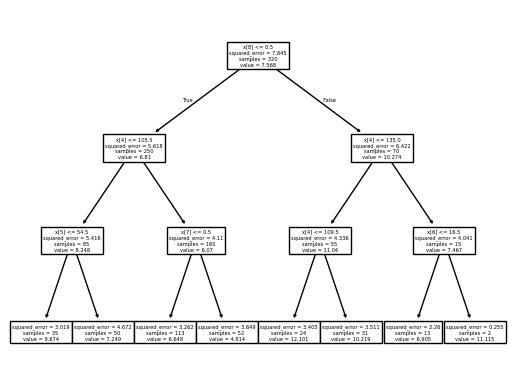

In [24]:
# (b) 
dtr = DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=1)
dtr.fit(X_train, y_train)
unprune_mse = mean_squared_error(y_test, dtr.predict(X_test))
print(f"Unpruned Tree MSE = {unprune_mse}")
plot_tree(dtr)

In [44]:
# (c) 
params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}
grid = GridSearchCV(estimator = dtr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print(f"Best Tree Depth in DTR = {grid.best_params_}")
print(f"Best Score = {-grid.best_score_}")

Best Tree Depth in DTR = {'max_depth': 5}
Best Score = 4.4731865070767185


In [45]:
# Try pruning instead
ccp_path = dtr.cost_complexity_pruning_path(X_train, y_train)
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
new_grid = GridSearchCV(estimator=dtr, param_grid={'ccp_alpha': ccp_path.ccp_alphas}, 
                        refit=True, cv=kfold, scoring='neg_mean_squared_error')
new_grid.fit(X_train, y_train)
print(f"Best Pruned Score: {-1*new_grid.best_score_}")

Best Pruned Score: 4.773778253594169


(d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important.

In [48]:
# Bagging is just RF with n = p
bag = BaggingRegressor()
bag.fit(X_train, y_train)
print(f"Bagging MSE: {mean_squared_error(y_test, bag.predict(X_test))}")

Bagging MSE: 3.3438485375000004


- Out of the box, bagging is doing better already by MSE over the pruned decision trees, even after we used cross validation to search for good parameters.

In [54]:
importances = np.mean([tree.feature_importances_ for tree in bag.estimators_], axis=0)
importance_df = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print("Feature importances (Bagging):")
print(importance_df)

Feature importances (Bagging):
ShelveLoc_Good      0.265801
Price               0.263504
CompPrice           0.096237
Age                 0.088888
Advertising         0.075440
Income              0.063449
ShelveLoc_Medium    0.039193
Population          0.035722
ShelveLoc_Bad       0.030426
Education           0.029316
US_No               0.004233
Urban_Yes           0.003544
Urban_No            0.002717
US_Yes              0.001532
dtype: float64


(e) Use random forests to analyze this data. What test MSE do you obtain? Use the feature_importance_ values to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [ ]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
print(f"RF Test MSE: {mean_squared_error(y_test, rf.predict(X_test))}")
importance_df = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importance_df)


RF Test MSE: 3.2391784048749996
Price               0.271394
ShelveLoc_Good      0.263565
Age                 0.096068
CompPrice           0.092851
Advertising         0.074459
Income              0.055224
Population          0.041191
ShelveLoc_Medium    0.034288
ShelveLoc_Bad       0.033720
Education           0.026451
US_No               0.002865
US_Yes              0.002815
Urban_No            0.002593
Urban_Yes           0.002515
dtype: float64


- We see similar feature importances (price and shelvloc_good the top two) and a slightly lower MSE. Next we'll try varying the number of features we allow the RF to select from at any given stage, m.

Lowest MSE at m = 10, Test MSE = 3.087


<function matplotlib.pyplot.show(close=None, block=None)>

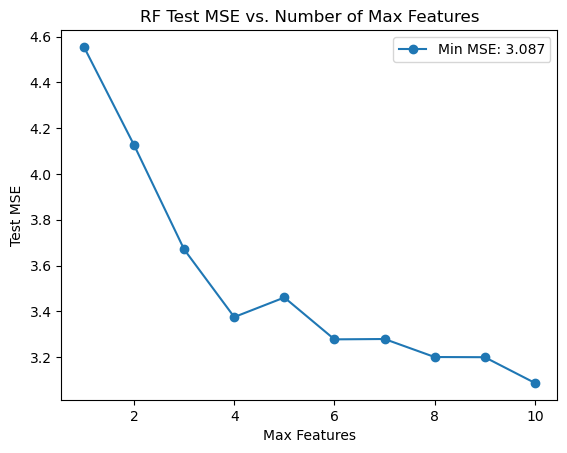

In [69]:
# Evaluate effect of m (max_features)
mses = []
ms = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for m in ms:
    rf = RandomForestRegressor(max_features=m, random_state=1)
    rf.fit(X_train, y_train)
    mses.append(mean_squared_error(y_test, rf.predict(X_test)))

print(f"Lowest MSE at m = {np.argmin(mses)+1}, Test MSE = {np.min(mses):.3f}")
plt.plot(ms, mses, marker='o', label = f"Min MSE: {np.min(mses):.3f}")
plt.legend()
plt.title('RF Test MSE vs. Number of Max Features')
plt.xlabel('Max Features')
plt.ylabel("Test MSE")
plt.show

- Generally, as we increased the features we allowed RF to select from, the test MSE continued to mostly decrease, with the lowest test MSE occurring at max_features = 10.

(f) Skipping part on BART for now.

## Problem 9
This problem involves the OJ data set which is part of the ISLP package.

(a) Create a training set containing a random sample of 800 obser- vations, and a test set containing the remaining observations.

(b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. What is the training error rate?

(c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?

(d) Use the export_tree() function to produce a text summary of the fitted tree. Pick one of the terminal nodes, and interpret the information displayed.

(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

(f) Use cross-validation on the training set in order to determine the optimal tree size.

(g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

(h) Which tree size corresponds to the lowest cross-validated classi- fication error rate?

(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

(j) Compare the training error rates between the pruned and un- pruned trees. Which is higher?

(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [105]:
oj = pd.read_csv('./Data/OJ.csv')
oj = pd.get_dummies(oj, columns=['Purchase', 'Store7'])
oj.head()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Purchase_CH,Purchase_MM,Store7_No,Store7_Yes
0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,True,False,True,False
1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,True,False,True,False
2,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,True,False,True,False
3,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1,False,True,True,False
4,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0,True,False,False,True


In [106]:
y_train.value_counts()

Purchase_CH
True     496
False    304
Name: count, dtype: int64

- Note the OJ data set has Purchase as the response and its options are MM for minute maid and CH for citrus hill, two companies.

Train Accuracy = 89.6%
Train Error = 10.4%


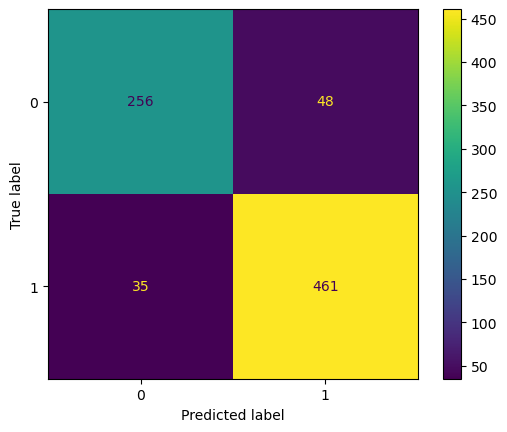

In [107]:
# (a)
X_train, X_test, y_train, y_test = train_test_split(oj.drop(columns=['Purchase_CH', 'Purchase_MM', 'Store7_No']), 
                                                    oj['Purchase_CH'], 
                                                    train_size=800, random_state=1)

# (b) Calculate training error rate
dtr = DecisionTreeClassifier(criterion='gini', random_state=1, min_samples_split=20)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
print(f"Train Accuracy = {accuracy_score(y_train, y_pred):.1%}")
print(f"Train Error = {1-accuracy_score(y_train, y_pred):.1%}")

Number of Leaf Nodes = 58
[Text(0.4526127049180328, 0.9583333333333334, 'x[8] <= 0.454\ngini = 0.471\nsamples = 800\nvalue = [304, 496]'), Text(0.20081967213114754, 0.875, 'x[8] <= 0.276\ngini = 0.356\nsamples = 289\nvalue = [222, 67]'), Text(0.32671618852459017, 0.9166666666666667, 'True  '), Text(0.08196721311475409, 0.7916666666666666, 'x[8] <= 0.051\ngini = 0.201\nsamples = 168\nvalue = [149, 19]'), Text(0.03278688524590164, 0.7083333333333334, 'x[1] <= 2.5\ngini = 0.028\nsamples = 71\nvalue = [70, 1]'), Text(0.01639344262295082, 0.625, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]'), Text(0.04918032786885246, 0.625, 'gini = 0.0\nsamples = 58\nvalue = [58, 0]'), Text(0.13114754098360656, 0.7083333333333334, 'x[0] <= 249.5\ngini = 0.302\nsamples = 97\nvalue = [79, 18]'), Text(0.08196721311475409, 0.625, 'x[15] <= 1.5\ngini = 0.168\nsamples = 54\nvalue = [49, 5]'), Text(0.06557377049180328, 0.5416666666666666, 'gini = 0.375\nsamples = 16\nvalue = [12, 4]'), Text(0.09836065573770492, 0

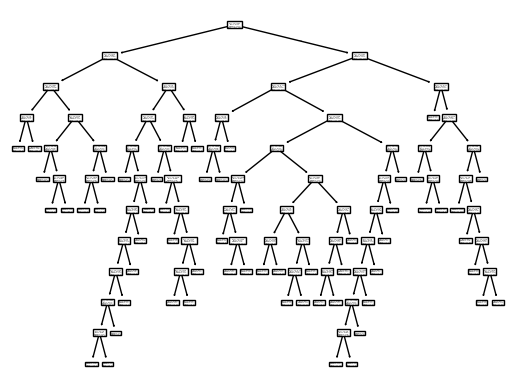

In [98]:
print(f"Number of Leaf Nodes = {dtr.get_n_leaves()}")
print(plot_tree(dtr))

- Note we adjusted the min_samples_split to help deal with over fitting. If you don't set that parameter, you get almost perfect accuracy. 
- We found 58 leaf nodes, which is still a lot.

In [ ]:
# (d) 
print(export_text(dtr, feature_names=X_train.columns))

|--- LoyalCH <= 0.45
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.05
|   |   |   |--- StoreID <= 2.50
|   |   |   |   |--- class: False
|   |   |   |--- StoreID >  2.50
|   |   |   |   |--- class: False
|   |   |--- LoyalCH >  0.05
|   |   |   |--- WeekofPurchase <= 249.50
|   |   |   |   |--- STORE <= 1.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- STORE >  1.50
|   |   |   |   |   |--- LoyalCH <= 0.07
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- LoyalCH >  0.07
|   |   |   |   |   |   |--- class: False
|   |   |   |--- WeekofPurchase >  249.50
|   |   |   |   |--- WeekofPurchase <= 273.50
|   |   |   |   |   |--- PriceCH <= 1.88
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- PriceCH >  1.88
|   |   |   |   |   |   |--- class: True
|   |   |   |   |--- WeekofPurchase >  273.50
|   |   |   |   |   |--- class: False
|   |--- LoyalCH >  0.28
|   |   |--- SpecialCH <= 0.50
|   |   |   |--- SalePriceMM <= 2.04
|   |   |   |   

- Looking at one of the leaf nodes we see that we predict Minute Maid when LoyalCH is < 0.05 and storeID <=2.5.

Test Accuracy = 77.8%
Test Error = 22.2%


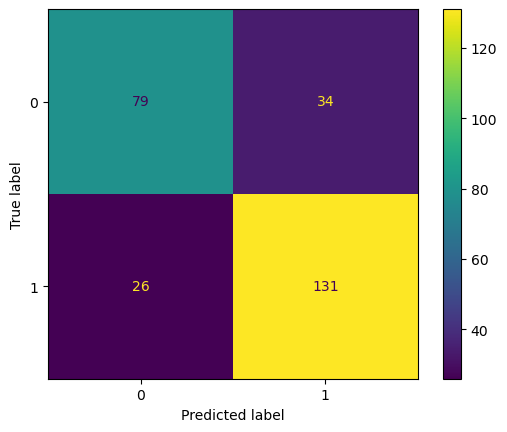

In [ ]:
# (e) Predict test metrics
y_pred = dtr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
print(f"Test Accuracy = {accuracy_score(y_test, y_pred):.1%}")
print(f"Test Error = {1-accuracy_score(y_test, y_pred):.1%}")

(f) Use cross-validation on the training set in order to determine the optimal tree size.

In [ ]:
# Declare rf model, some params, and the do 2 loops (can't do grid search)
max_features = [1, 3, 6, 9, 12]
n_estimators = [25, 50, 75, 100, 125, 150, 175, 200]

mses = np.zeros((len(max_features), len(n_estimators)))
for i, m in enumerate(max_features):
    for j, n in enumerate(n_estimators):
        rf = RandomForestRegressor(max_features=m, n_estimators=n)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        mses[i,j] = mean_squared_error(y_test, y_pred)
    plt.plot(n_estimators, mses[i,:], label=f"max_features = {m}")
# Plot results
plt.title("MSE of Various n_estimators and max_features")
plt.xlabel("N Features")
plt.ylabel("MSE")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (199,) and (10,)

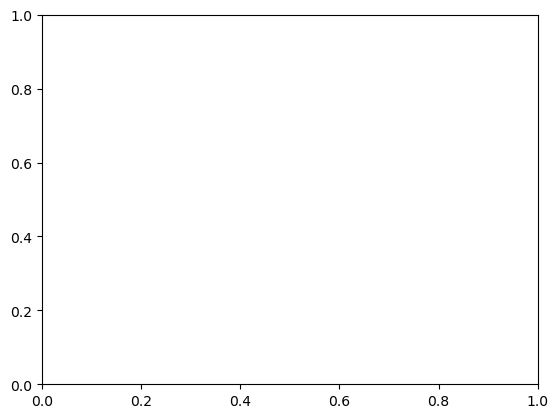

In [ ]:
# (f) CV to get tree size
max_depths = [1,3,5,6,7,10]
min_samples_leafs = list(range(1,200))

accuracies = np.zeros((len(max_depths), len(min_samples_leafs)))
ms = list(range(1,200))
ds = [1, 3, 6, 9]
for d in max_depths:
    for m in min_samples_leafs:
        dtc = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=m, max_depth=d)
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)
        accuracies[d,m] = accuracy_score(y_test, y_pred)

    #print(f"Highest Accuracy at m = {np.argmax(accuracies)+1}, Test MSE = {np.max(accuracies):.1%}")
    plt.plot(ms, accuracies, marker='o', label = f"Min MSE: {np.min(mses):.3f}")
plt.legend()
plt.title('RF Test MSE vs. Number of Max Features')
plt.xlabel('Max Features')
plt.ylabel("Test MSE")
plt.show

(d) Use the export_tree() function to produce a text summary of the fitted tree. Pick one of the terminal nodes, and interpret the information displayed.

(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?



(g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

(h) Which tree size corresponds to the lowest cross-validated classi- fication error rate?

(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

(j) Compare the training error rates between the pruned and un- pruned trees. Which is higher?

(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?